In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [3]:
plt.style.use('fivethirtyeight')

In [4]:
import missingno as msno

In [5]:
import os
for dirname,_,filenames in os.walk('/content/drive/MyDrive/input'):
  for filename in filenames:
    print(os.path.join(dirname,filename))


In [6]:
plt.rcParams['figure.figsize'] = (12,8)

In [7]:
%time
file = ('/content/kl.csv')
df = pd.read_csv(file,encoding='latin-1')

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 10.7 µs


In [8]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31.0,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94.0,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5M
1,1,20801,Cristiano Ronaldo,33.0,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94.0,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1M
2,2,190871,Neymar Jr,26.0,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92.0,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1M
3,3,193080,De Gea,27.0,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91.0,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6M
4,4,192985,K. De Bruyne,27.0,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91.0,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4M


In [9]:
df.shape

(18207, 89)

In [10]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [11]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18206 non-null  float64
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18206 non-null  float64
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

In [13]:
df.isnull().sum()

,0
ID,0
Name,0
Age,1
Photo,0
Nationality,0
...,...
GKHandling,48
GKKicking,48
GKPositioning,48
GKReflexes,48


In [14]:
df['ShortPassing'].fillna(df['ShortPassing'].mean(),inplace=True)
df['Volleys'].fillna(df['Volleys'].mean(),inplace = True)
df['Dribbling'].fillna(df['Dribbling'].mean(),inplace = True)
df['Curve'].fillna(df['Curve'].mean(),inplace= True)
df['FKAccuracy'].fillna(df['FKAccuracy'],inplace= True)
df['LongPassing'].fillna(df['LongPassing'].mean(),inplace =True)
df['BallControl'].fillna(df['BallControl'].mean(),inplace= True)
df['HeadingAccuracy'].fillna(df['HeadingAccuracy'].mean(),inplace=True)
df['Finishing'].fillna(df['Finishing'].mean(),inplace = True)
df['Crossing'].fillna(df['Crossing'].mean(),inplace= True)
df['Weight'].fillna('200lb',inplace =True)
df['Contract Valid Until'].fillna(2019,inplace=True)
df['Height'].fillna("5'11",inplace = True)
df['Loaned From'].fillna('None',inplace = True)
df['Joined'].fillna('Jul 1,2018',inplace =True)
df['Jersey Number'].fillna('8',inplace = True)
df['Body Type'].fillna('Normal',inplace = True)
df['Position'].fillna('ST',inplace = True)
df['Skill Moves'].fillna(df['Skill Moves'].median(),inplace = True)
df['Weak Foot'].fillna(3,inplace=True)
df['Preferred Foot'].fillna('Right',inplace =True)
df['International Reputation'].fillna(1,inplace = True)
df['Wage'].fillna('€200K', inplace = True)

In [15]:
df.fillna(0,inplace =True)

In [16]:
df.isnull().sum()

,0
ID,0
Name,0
Age,0
Photo,0
Nationality,0
...,...
GKHandling,0
GKKicking,0
GKPositioning,0
GKReflexes,0


In [17]:
def country(x):
  return df[df['Nationality'] ==x].head()

country('India')

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
8605,190939,S. Chhetri,33.0,https://cdn.sofifa.org/players/4/19/190939.png,India,https://cdn.sofifa.org/flags/159.png,67.0,67,0,https://cdn.sofifa.org/flags/159.png,...,67.0,30.0,24.0,44.0,10.0,7.0,11.0,9.0,10.0,0
10011,223763,S. Jhingan,24.0,https://cdn.sofifa.org/players/4/19/223763.png,India,https://cdn.sofifa.org/flags/159.png,65.0,71,0,https://cdn.sofifa.org/flags/159.png,...,64.0,64.0,61.0,60.0,13.0,11.0,7.0,11.0,12.0,0
12598,217225,J. Lalpekhlua,27.0,https://cdn.sofifa.org/players/4/19/217225.png,India,https://cdn.sofifa.org/flags/159.png,63.0,64,0,https://cdn.sofifa.org/flags/159.png,...,47.0,28.0,31.0,29.0,13.0,11.0,10.0,10.0,11.0,0
12811,225213,G. Singh Sandhu,26.0,https://cdn.sofifa.org/players/4/19/225213.png,India,https://cdn.sofifa.org/flags/159.png,63.0,68,0,https://cdn.sofifa.org/flags/159.png,...,57.0,19.0,15.0,11.0,63.0,59.0,59.0,62.0,64.0,0
13508,238205,A. Edathodika,31.0,https://cdn.sofifa.org/players/4/19/238205.png,India,https://cdn.sofifa.org/flags/159.png,62.0,62,0,https://cdn.sofifa.org/flags/159.png,...,49.0,67.0,62.0,68.0,14.0,15.0,14.0,11.0,7.0,0


In [18]:
df['Preferred Foot'].value_counts()

,count
Preferred Foot,
Right,13996
Left,4211


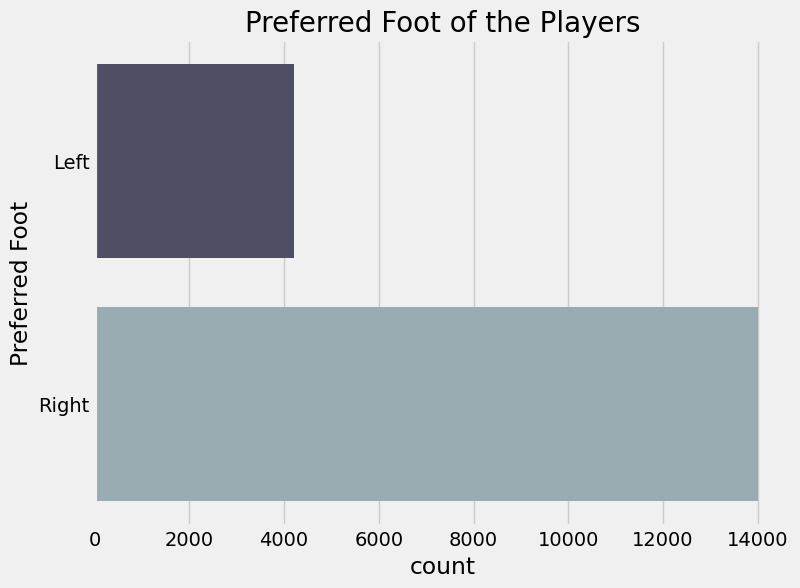

In [19]:
plt.figure(figsize=(8,6))
sns.countplot(df['Preferred Foot'],palette = 'bone')
plt.title('Preferred Foot of the Players',fontsize = 20)
plt.show()


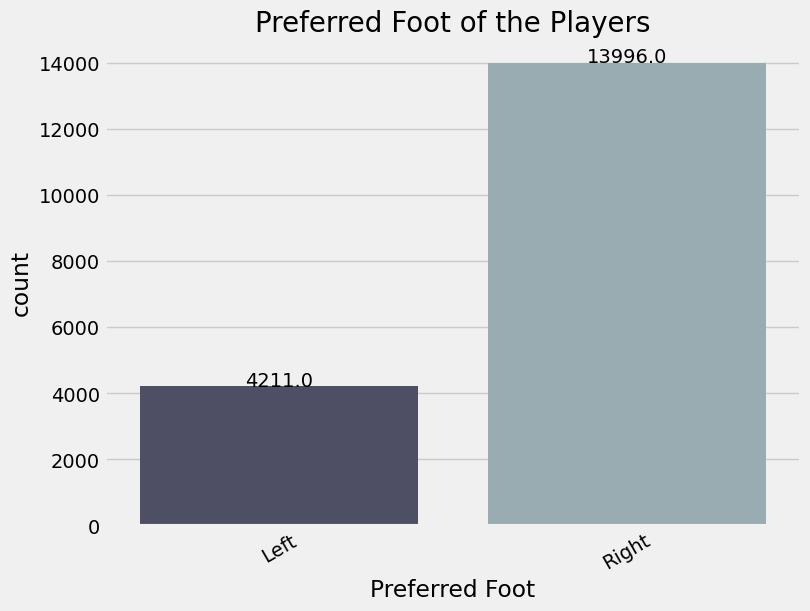

In [20]:
fig, ax = plt.subplots(figsize = (8,6))
graph = sns.countplot(ax=ax,x=df['Preferred Foot'],data=df ,palette ='bone')
graph.set_title('Preferred Foot of the Players',fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels(),rotation=30)
for p in graph.patches:
  height = p.get_height()
  graph.text(p.get_x() +p.get_width()/2.,height +0.1,height , ha="center")

In [21]:
df['Preferred Foot'].value_counts()/len(df)

,count
Preferred Foot,
Right,0.768715
Left,0.231285


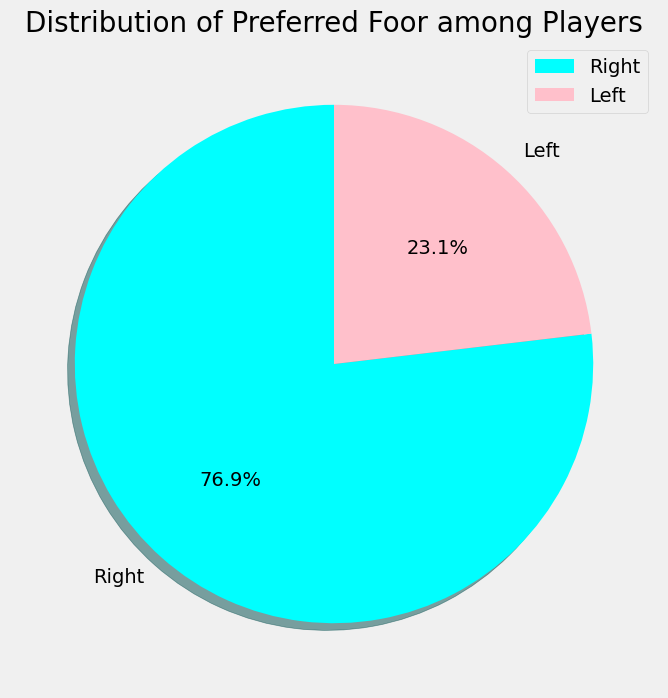

In [22]:
labels = df['Preferred Foot'].value_counts().index
size = df['Preferred Foot'].value_counts()
colors = ['cyan','pink']
plt.pie(size, labels =labels,colors = colors,shadow=True,autopct ='%1.1f%%',startangle =90)
plt.title('Distribution of Preferred Foor among Players',fontsize = 20)
plt.legend()
plt.show()

In [23]:
df['Weak Foot'].value_counts()

,count
Weak Foot,
3.0,11397
2.0,3761
4.0,2662
5.0,229
1.0,158


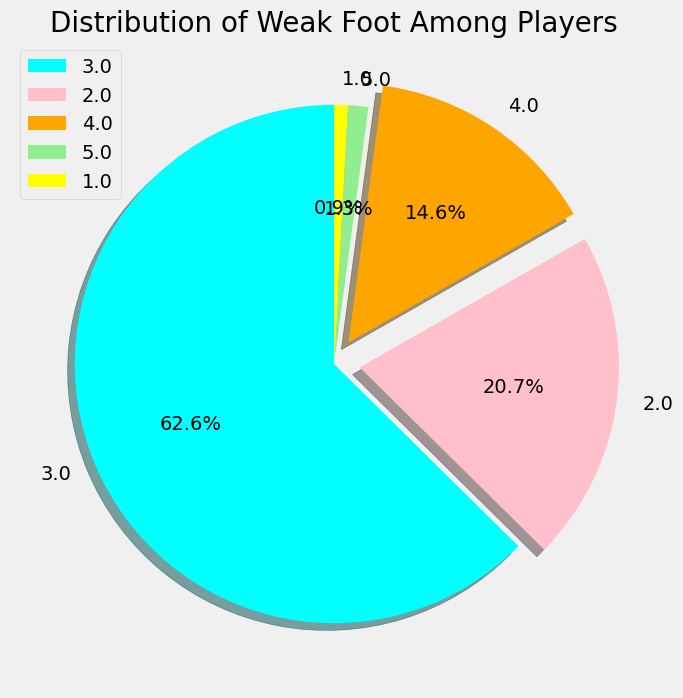

In [24]:
labels = df['Weak Foot'].value_counts().index
size = df['Weak Foot'].value_counts()
colors = ['cyan','pink','orange','lightgreen','yellow']
explode = [0,0.1,0.1,0,0]
plt.pie(size,labels =labels,colors =colors ,explode = explode,shadow =True,autopct='%1.1f%%',startangle = 90)
plt.title('Distribution of Weak Foot Among Players',fontsize = 20)
plt.legend()
plt.show()



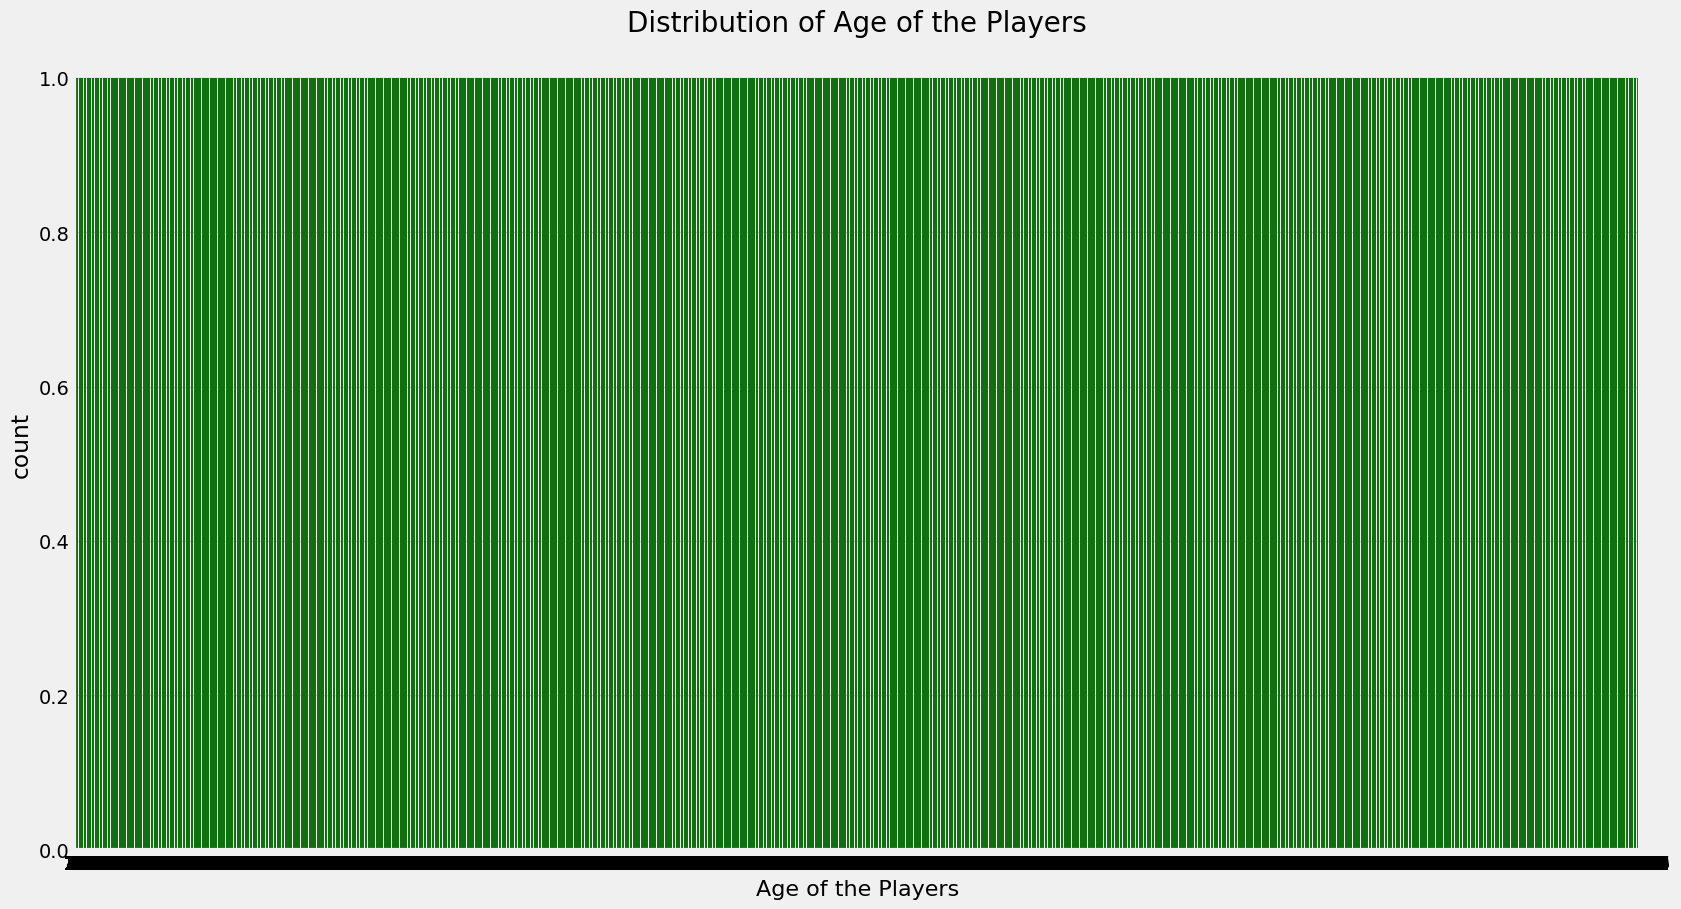

In [25]:
x = df['Age']
plt.figure(figsize = (18,10))
ax = sns.countplot(x,color='g')
ax.set_xlabel(xlabel = 'Age of the Players',fontsize= 16)
ax.set_title(label = 'Distribution of Age of the Players',fontsize = 20)
plt.show()

KeyboardInterrupt: 

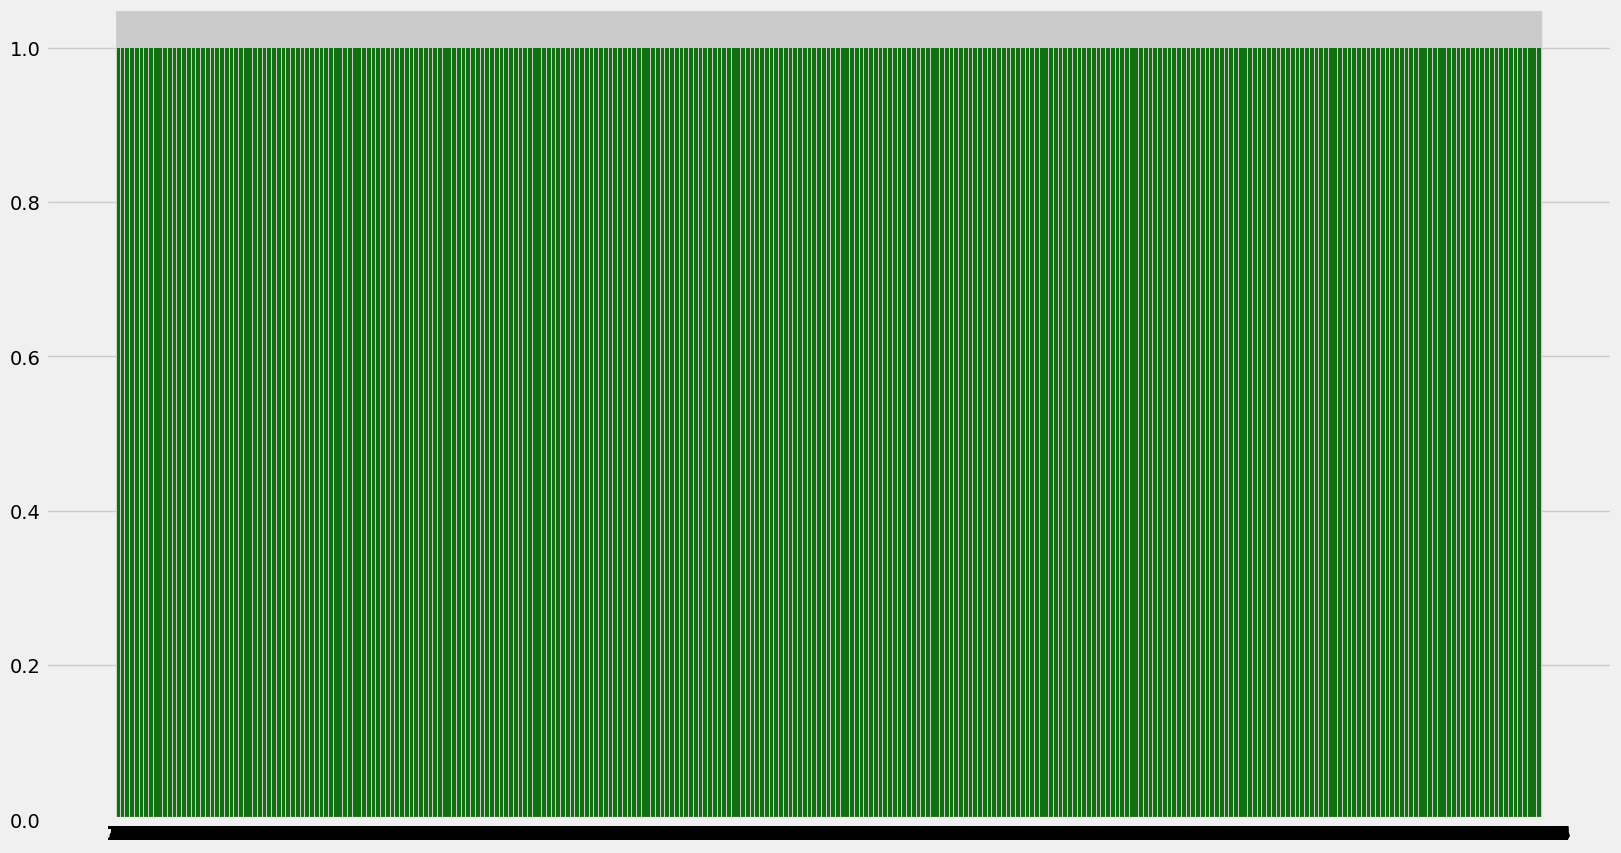

In [26]:
x = df['Age']
plt.figure(figsize=(18,10))
ax = sns.countplot(x, color='g')
ax.set_xlabel(xlabel = 'Age of the Players', fontsize = 16)
ax.set_title(label = 'Distribution of Age of the Players', fontsize = 20)
plt.show()

In [ ]:
labels = df['International Reputation'].value_counts().index
size = df['International Reputation'].value_counts()
explode = [0, 0.1, 0.1, 0, 0]
plt.pie(size, labels = labels, explode = explode, shadow = True, autopct='%1.1f%%',startangle = 90)
plt.title('Distribution of International Reputation of players', fontsize = 20)
plt.legend()
plt.show()

In [ ]:
x = df['Age']
plt.figure(figsize = (12,8))
plt.style.use('ggplot')
ax = sns.distplot(x,bins =20,kde = True,color = 'g')
ax.set_xlabel(xlabel= 'Age of the Players',fontsize = 16)
ax.set_title(label ='Histogram for Age distribution of Players',fontsize = 20)
plt.show()

In [ ]:
df['International Reputation'].value_counts()

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(df['International Reputation'], palette = 'husl')
plt.title('International Reputation of the Players', fontsize = 20)
plt.show()

In [ ]:
labels = df['International Reputation'].value_counts().index
size = df['International Reputation'].value_counts()
explode = [0, 0.1, 0.1, 0, 0]
plt.pie(size, labels = labels, explode = explode, shadow = True, autopct='%1.1f%%',startangle = 90)
plt.title('Distribution of International Reputation of players', fontsize = 20)
plt.legend()
plt.show()

In [ ]:
df.groupby('Preferred Foot')['International Reputation'].value_counts()

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(df['International Reputation'], hue=df['Preferred Foot'], palette = 'husl')
plt.title('International Reputation of Left and Right Footed Players ', fontsize = 20)
plt.show()

In [ ]:
df['Work Rate'].value_counts()

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
graph = sns.countplot(ax=ax,x=df['Work Rate'], data=df, palette = 'PuBuGn_d')
graph.set_title('Work Rate of the Players', fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
graph = sns.countplot(ax=ax,x=df['Work Rate'], data=df, palette = 'PuBuGn_d')
graph.set_title('Work Rate of the Players', fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

In [ ]:
labels = df['Work Rate'].value_counts().index
size = df['Work Rate'].value_counts()
explode = [0,0,0.1,0,0.1,0,0,0,0]
plt.pie(size, labels = labels, explode = explode, shadow = True, autopct='%1.1f%%',startangle = 90)
plt.title('Distribution of Work Rate of players', fontsize = 20)
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
graph = sns.countplot(ax=ax,x=df['Work Rate'], data=df, hue='Preferred Foot', palette = 'PuBuGn_d')
graph.set_title('Work Rate of Players segregated by Preferred Foot'  , fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

In [ ]:
df['Skill Moves'].value_counts()

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
graph = sns.countplot(ax=ax,x=df['Skill Moves'], data=df, palette = 'PuBuGn_d')
graph.set_title('Skill Moves of the Players', fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
graph = sns.countplot(ax=ax,x=df['Skill Moves'], data=df, hue='Preferred Foot', palette = 'PuBuGn_d')
graph.set_title('Skill Moves of Players segregated by Preferred Foot'  , fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

In [ ]:
x = df['Special']
plt.figure(figsize=(18,10))
ax = sns.distplot(x)
ax.set_xlabel(xlabel = "Player's Special Scores", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of Players', fontsize = 16)
ax.set_title(label = 'Distribution of Players Special Scores', fontsize = 20)
plt.show()

In [ ]:
x = df['Potential']
plt.figure(figsize=(18,10))
ax = sns.countplot(x, color='g')
ax.set_xlabel(xlabel = "Player's Potential Scores", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of Players', fontsize = 16)
ax.set_title(label = 'Distribution of Players Potential Scores', fontsize = 20)
plt.show()

In [ ]:
x = df['Overall']
plt.figure(figsize=(18,10))
ax = sns.countplot(x, palette='rocket')
ax.set_xlabel(xlabel = "Player's Overall Scores", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of Players', fontsize = 16)
ax.set_title(label = 'Distribution of Players Overall Scores', fontsize = 20)
plt.show()

In [ ]:
df['Position'].value_counts()

In [ ]:
plt.figure(figsize = (18, 8))
plt.style.use('ggplot')
ax = sns.countplot('Position', data = df, palette = 'PuBuGn_d')
ax.set_xlabel(xlabel = 'Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Number of Players', fontsize = 16)
ax.set_title(label = 'Count of Players with Positions', fontsize = 20)
plt.show()

In [ ]:
df['Nationality'].nunique()

In [ ]:
df['Nationality'].unique()

In [ ]:
top_countries = df['Nationality'].value_counts().head(10)

top_countries

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
x = top_countries.values
y = top_countries.index
ax.barh(y, x, align='center', color='green')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Players')
ax.set_ylabel('Name of Countries', rotation=0)
ax.set_title('Top 10 Countries with most number of players')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
x = top_countries.values
y = top_countries.index
ax.barh(y, x, align='center', color='green')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Players')
ax.set_ylabel('Name of Countries', rotation=0)
ax.set_title('Top 10 Countries with most number of players')
plt.show()

In [ ]:
top_countries_name = top_countries.index

top_countries_name

In [ ]:
df_country_age = df.loc[df['Nationality'].isin(top_countries_name) & df['Age']]
plt.figure(1 , figsize = (12,6))
sns.boxplot(x = 'Nationality' , y = 'Age' , data = df_country_age, palette='rocket')
plt.title('Age Distribution in top countries')
plt.xticks(rotation = 50)
plt.show()

In [ ]:
df_country_rating = df.loc[df['Nationality'].isin(top_countries_name) & df['Overall']]
plt.figure(1 , figsize = (12,6))
sns.barplot(x = 'Nationality' , y = 'Overall' , data = df_country_rating, palette='spring')
plt.title('Overall Rating Distribution of Players in top countries')
plt.xticks(rotation = 50)
plt.show()

In [ ]:
df_country_rating = df.loc[df['Nationality'].isin(top_countries_name) & df['Potential']]
plt.figure(1 , figsize = (12,6))
sns.barplot(x = 'Nationality' , y = 'Potential' , data = df_country_rating, palette='PuBuGn_d')
plt.title('Potential Rating Distribution of Players in top countries')
plt.xticks(rotation = 50)
plt.show()

In [ ]:
df['Club'].nunique()

In [ ]:
df['Club'].unique()

In [ ]:
clubs = ['FC Barcelona','Real Madrid','Juventus','Liverpool','Manchester United',
         'Chelsea','Arsenal','Paris Saint-Germain' ,'FC Bayern München','Manchester City']

In [ ]:
df_club_age = df.loc[df['Club'].isin(clubs) & df['Age']]
plt.figure(1 , figsize = (12,6))
sns.boxplot(x = 'Club', y = 'Age' , data = df_club_age, palette='spring')
plt.title('Age Distribution in famous clubs')
plt.xticks(rotation = 50)
plt.show()

In [ ]:
df_club_rating = df.loc[df['Club'].isin(clubs) & df['Overall']]
plt.figure(1,figsize = (12,6))
sns.boxplot(x='Club',y='Overall',data = df_club_rating,palette = 'PuBuGn_d')
plt.title('Overall Rating Distribution in famous clubs')
plt.xticks(rotation = 50)
plt.show()

In [ ]:
best_dict ={}
for club in df['Club'].unique():
  overall_rating = df['Overall'][df['Club']==club].sum()
  best_dict[club] = overall_rating
best_club =pd.DataFrame.from_dict(best_dict,orient='index',columns = ['overall'])
best_club['club'] = best_club.index
best_club = best_club.sort_value(by = 'Overall',ascending =False)
plt.figure(1,figsize = (15,6))
sns.barplot(x = 'club',y = 'overall',data =best_club.head(10),palette = 'Reds')
plt.xticks(rotation = 70)
plt.xlabel("Club")
plt.ylabel('Sum of OVerall Rating of players in club')
plt.title('Clubs with best Players(sum of overall ratings of plyers per club)')
plt.ylim(2450,2600)
plt.show()

In [ ]:
df_best_players = df.DataFrame.copy(df.sort_value(by = 'Overall',ascending = False).head(10))
plt.figure(1,figsize=(12,6))
sns.barplot(x = 'Name',y = 'Overall',data = df_best_players,palette = 'PuBuGn_d')
plt.ylim(85,95)
plt.show()

Highest Earners

In [ ]:
def normalizing_wage(x):
  if '€'in str(x) and 'M' in str(x):
    c = str(x).replace('€','')
    c = str(c).replace('M','')
    c = float(c) * 1000000
  else:
    c = str(x).replace('€','')
    c = str(c).replace('K','')
    c = float(c) * 1000
  return c
df['Normalized_Wage'] = df['Wage'].apply(lambda x : normalizing_wage(x))
df.sort_values(by = 'Normalized_Wage',ascending = False)[['Name','Club','Nationality','Overall','Age','Normalized_Wage','Wage']].head(5)

In [ ]:
df.sort_value(by ='Age',ascending =False)[['Name','Club','Nationality'
,'Overall','Age']].head()

In [ ]:
df.sort_values(by = 'Age' , ascending = True)[['Name','Club','Nationality','Overall', 'Age' ]].head()

In [ ]:
df.sort_values(by = 'Penalties' , ascending = False)[['Name','Club','Nationality','Age','Penalties']].head()

In [ ]:
df.sort_values(by = 'BallControl' , ascending = False)[['Name','Club','Nationality','Overall', 'Age','BallControl']].head()

In [ ]:
df.sort_values(by = 'SprintSpeed' , ascending = False)[['Name','Club','Nationality','Overall', 'Age','SprintSpeed']].head()

In [ ]:
df.sort_values(by = 'Dribbling' , ascending = False)[['Name','Club','Nationality','Overall', 'Age','Dribbling']].head()

In [ ]:
df.sort_values(by = 'Finishing' , ascending = False)[['Name','Club','Nationality','Overall', 'Age','Finishing']].head()